# Example: FPCA

The Berkeley Growth Study (Tuddenham and Snyder, 1954) recorded the heights of 54 girls and 39 boys between the ages of 1 and 18 years. Heights were measured at 31 ages for each child.

- 54+39 = 93 Time Series
- 31 Time Stamps (years)

In [1]:
# Example: Berkeley Growth Study
# from https://fda.readthedocs.io/en/latest/auto_examples/plot_fpca.html#sphx-glr-auto-examples-plot-fpca-py

In [2]:
# Author: Yujian Hong
# License: MIT

import matplotlib.pyplot as plt
import pandas as pd
import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
    FourierBasis,
    MonomialBasis,
)

In [3]:
# 92 time series
skfda.datasets.fetch_growth(as_frame=True)['data']

,height
0,Data set: [[[ 81.3] [ 84.2] [ 86.4] [...
1,Data set: [[[ 76.2] [ 80.4] [ 83.2] [...
2,Data set: [[[ 76.8] [ 79.8] [ 82.6] [...
3,Data set: [[[ 74.1] [ 78.4] [ 82.6] [...
4,Data set: [[[ 74.2] [ 76.3] [ 78.3] [...
...,...
88,Data set: [[[ 74.9] [ 78.1] [ 80.6] [...
89,Data set: [[[ 77.6] [ 81.1] [ 84. ] [...
90,Data set: [[[ 68.6] [ 73.6] [ 78.6] [...
91,Data set: [[[ 79.9] [ 82.6] [ 84.8] [...


Data Length 93


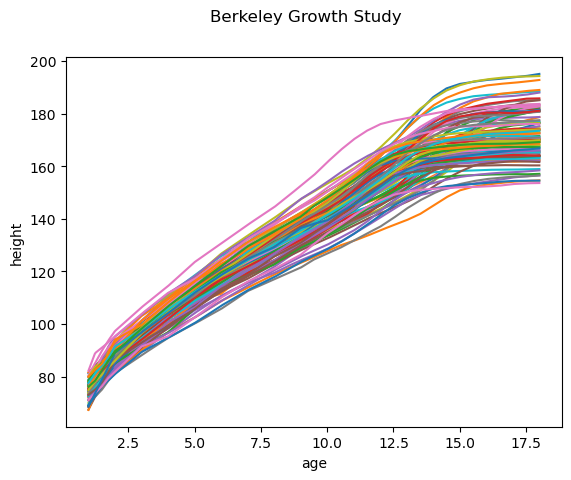

In [4]:
dataset = skfda.datasets.fetch_growth()
fd = dataset['data'] #TIME SERIES
print('Data Length', len(fd.data_matrix))
y = dataset['target'] # GIRL / BOY
fd.plot()
plt.show()

In [5]:
fd.grid_points # Timestamps (X-AXIS)

(array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,
         7.  ,  8.  ,  8.5 ,  9.  ,  9.5 , 10.  , 10.5 , 11.  , 11.5 ,
        12.  , 12.5 , 13.  , 13.5 , 14.  , 14.5 , 15.  , 15.5 , 16.  ,
        16.5 , 17.  , 17.5 , 18.  ]),)

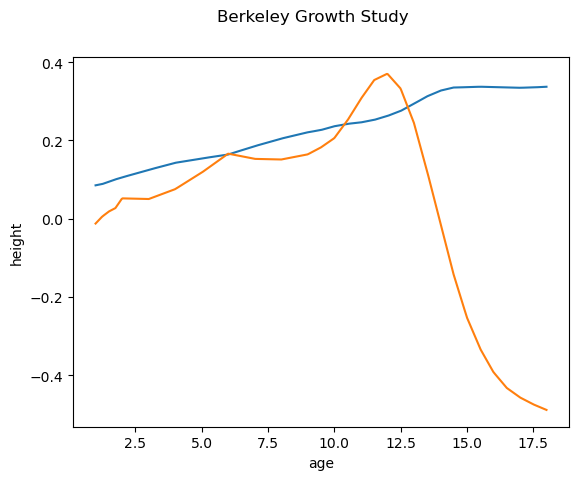

Length PC Scores: 93


In [6]:
# FPCA
fpca_discretized = FPCA(n_components=2, centering=True)
fpca_discretized.fit(fd)
fpca_discretized.components_.plot()
plt.show()
# Adding PC scores
pc_scores = fpca_discretized.transform(fd)
print('Length PC Scores:', len(pc_scores))

In [7]:
# Explain variance ratio
print('Explain variance FPC1 (%): ', fpca_discretized.explained_variance_ratio_[0] * 100)
print('Explain variance FPC2 (%): ', fpca_discretized.explained_variance_ratio_[1] * 100)

Explain variance FPC1 (%):  80.99678392293828
Explain variance FPC2 (%):  13.537043011980987


In [8]:
# --- Loadings ---
# Extract the principal components (loadings)
principal_components = fpca_discretized.components_

# Extract loadings for each time point from the first and second principal components
loadings_pc1 = principal_components.data_matrix[0, :, 0]  # Loadings for the first PC
loadings_pc2 = principal_components.data_matrix[1, :, 0]  # Loadings for the second PC
loadings_df = pd.DataFrame({
                            'PC1_Loadings': loadings_pc1,
                            'PC2_Loadings': loadings_pc2})

loadings_df

,PC1_Loadings,PC2_Loadings
0,0.085310,-0.012366
1,0.088528,0.005453
2,0.094547,0.018412
3,0.100470,0.027250
4,0.105599,0.051995
5,0.124757,0.050201
6,0.142822,0.075540
7,0.153920,0.117792
8,0.164072,0.166253
9,0.185403,0.152887


In [9]:
# Mean from the FPCA

In [10]:
fpca_discretized.mean_

FDataGrid(
    array([[[ 74.76774194],
            [ 78.69139785],
            [ 82.10645161],
            [ 85.15053763],
            [ 87.90967742],
            [ 96.29247312],
            [103.80645161],
            [110.79032258],
            [117.60967742],
            [123.90430108],
            [129.78709677],
            [132.73010753],
            [135.68064516],
            [138.50645161],
            [141.35483871],
            [144.38387097],
            [147.49032258],
            [150.69139785],
            [153.88817204],
            [156.98064516],
            [159.90860215],
            [162.60430108],
            [164.98602151],
            [166.9655914 ],
            [168.5516129 ],
            [169.68817204],
            [170.55591398],
            [171.15376344],
            [171.5688172 ],
            [171.84623656],
            [172.13548387]]]),
    grid_points=(array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,
            7.  ,  8.  ,  8.5 ,

# Mean from the functional PCA object

In [11]:
fpca_discretized.mean_.data_matrix.shape

(1, 31, 1)

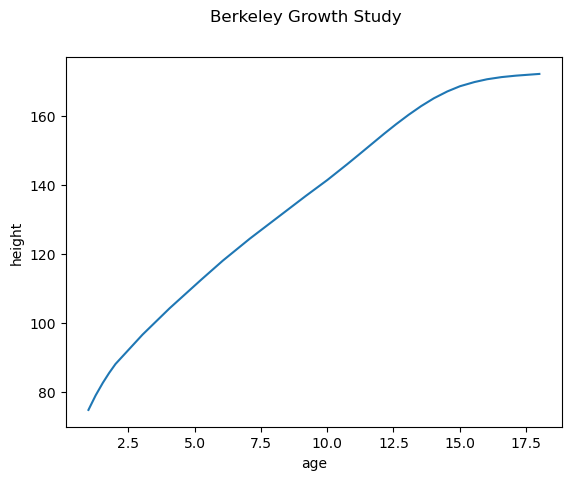

In [12]:
fpca_discretized.mean_.plot()
plt.show()

# Mean from the original data for comparison

In [13]:
fd.data_matrix.shape

(93, 31, 1)

In [14]:
data = fd.data_matrix
# Aplanar los datos a una forma bidimensional (93*31, 1)
data_reshape = data.reshape(93, 31)
# Crear un DataFrame de pandas
df = pd.DataFrame(data_reshape)
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,81.3,84.2,86.4,88.9,91.4,101.1,109.5,115.8,121.9,130.0,...,181.2,186.3,189.6,191.3,192.1,192.8,193.2,193.8,194.3,195.1
1,76.2,80.4,83.2,85.4,87.6,97.0,104.6,112.3,118.9,125.0,...,153.8,156.3,159.2,163.3,167.7,171.5,174.3,176.1,177.4,178.7
2,76.8,79.8,82.6,84.7,86.7,94.2,100.4,107.1,112.3,118.6,...,155.1,159.5,163.3,166.8,167.8,168.8,169.8,170.9,171.2,171.5
3,74.1,78.4,82.6,85.4,88.1,98.6,104.4,111.0,116.3,123.2,...,162.2,167.4,172.5,176.3,178.5,179.8,180.7,181.4,181.6,181.8
4,74.2,76.3,78.3,80.3,82.2,89.4,96.9,104.1,110.7,115.8,...,155.8,160.4,165.1,168.5,170.4,171.6,172.4,172.5,172.5,172.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,74.9,78.1,80.6,83.4,86.0,96.5,104.6,111.8,117.9,124.1,...,164.5,166.0,166.7,167.4,167.9,168.1,168.5,168.9,169.4,169.8
89,77.6,81.1,84.0,87.2,91.4,98.0,105.6,112.2,118.6,124.2,...,166.0,168.3,169.8,170.7,171.5,172.1,172.5,172.7,173.1,173.5
90,68.6,73.6,78.6,83.6,88.9,96.8,104.1,111.8,118.6,124.7,...,160.8,162.2,163.1,163.7,164.3,164.8,165.4,166.0,166.3,166.8
91,79.9,82.6,84.8,88.6,94.0,99.6,108.2,116.2,124.0,131.1,...,166.2,166.4,166.6,167.0,167.5,167.7,168.0,168.3,168.4,168.6


In [15]:
row_means = pd.DataFrame(df.mean(axis=1))
column_means = pd.DataFrame(df.mean(axis=0))

In [16]:
row_means

,0
0,148.987097
1,135.700000
2,132.525806
3,138.906452
4,132.209677
...,...
88,136.454839
89,138.354839
90,134.577419
91,140.332258


In [17]:
column_means

,0
0,74.767742
1,78.691398
2,82.106452
3,85.150538
4,87.909677
5,96.292473
6,103.806452
7,110.790323
8,117.609677
9,123.904301


# Column means (by timestamps) equal to mean from FPCA object

In [18]:
pd.DataFrame(fpca_discretized.mean_.data_matrix.flatten()) - column_means

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0
